In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("myapp") \
        .master("local") \
        .config("spark.executor.memory", "1g") \
        .config("spark.mongodb.input.uri","mongodb://172.17.0.3:27017") \
        .config("spark.mongodb.output.uri","mongodb://172.17.0.3:27017") \
        .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.0") \
        .getOrCreate()

In [3]:
df = spark.read.format("mongo") \
               .option("database","test") \
               .option("collection", "products") \
               .load()

In [4]:
df.printSchema()

root
 |-- ListPrice: double (nullable = true)
 |-- MakeFlag: integer (nullable = true)
 |-- ModelName: string (nullable = true)
 |-- ProductID: integer (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- ProductNumber: string (nullable = true)
 |-- StandardCost: double (nullable = true)
 |-- SubCategoryID: integer (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



In [9]:
df.show()

+---------+--------+--------------------+---------+--------------------+-------------+------------+-------------+--------------------+
|ListPrice|MakeFlag|           ModelName|ProductID|         ProductName|ProductNumber|StandardCost|SubCategoryID|                 _id|
+---------+--------+--------------------+---------+--------------------+-------------+------------+-------------+--------------------+
|   1431.5|       1|       HL Road Frame|      680|HL Road Frame - B...|   FR-R92B-58|     1059.31|           14|{64192a87edd8634c...|
|    34.99|       0|           Sport-100|      707|Sport-100 Helmet,...|    HL-U509-R|     13.0863|           31|{64192a87edd8634c...|
|   1431.5|       1|       HL Road Frame|      706|HL Road Frame - R...|   FR-R92R-58|     1059.31|           14|{64192a87edd8634c...|
|    34.99|       0|           Sport-100|      708|Sport-100 Helmet,...|      HL-U509|     13.0863|           31|{64192a87edd8634c...|
|      9.5|       0| Mountain Bike Socks|      709|Moun

In [37]:
from pyspark.sql.functions import desc

tmpdf = df.groupby(df['ModelName']).count().sort(desc("count"))
productcountdf = tmpdf.filter(tmpdf['count']>1)
productcountdf.show()

+-------------------+-----+
|          ModelName|count|
+-------------------+-----+
|      LL Road Frame|   12|
|           Road-650|   12|
|      HL Road Frame|   11|
|       Touring-3000|   10|
|   LL Touring Frame|   10|
|  HL Mountain Frame|   10|
|  LL Mountain Frame|   10|
|       Mountain-500|   10|
|           Road-250|    8|
|   HL Touring Frame|    8|
|       Touring-1000|    8|
|       Mountain-100|    8|
|       Mountain-200|    6|
|      ML Road Frame|    5|
|           Road-150|    5|
|           Road-450|    5|
|ML Mountain Frame-W|    5|
|         Road-550-W|    5|
|    ML Road Frame-W|    5|
|           Road-750|    4|
+-------------------+-----+
only showing top 20 rows



In [27]:
productcountdf.write.format("mongo").mode("append") \
              .option("database","test2") \
              .option("collection", "ModelNameCount") \
              .save()

In [38]:
dfPanda = productcountdf.toPandas()

<Figure size 432x288 with 0 Axes>

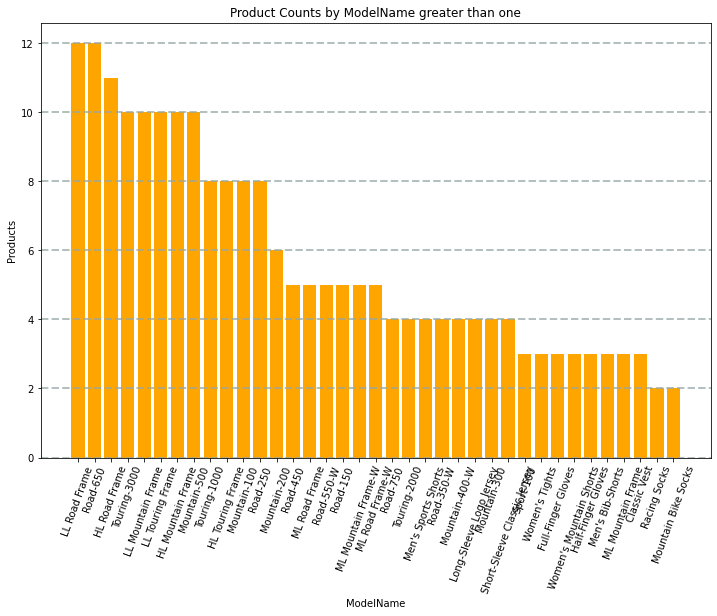

In [39]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(12,8))

# Create a bar plot of product counts by ModelName
plt.bar(x=dfPanda['ModelName'], height=dfPanda['count'], color='orange')

# Customize the chart
plt.title('Product Counts by ModelName greater than one')
plt.xlabel('ModelName')
plt.ylabel('Products')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=70)

# Show the plot area
plt.show()